In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from ydata_profiling import ProfileReport

# Funding Rounds

In [2]:
rounds = pd.read_csv('/Users/Tom/Library/Mobile Documents/com~apple~CloudDocs/Uni Wien/Thesis/Other/startupsuccess_vc_github/rounds.csv')

In [3]:
rounds_count = rounds.groupby('company_permalink').size().reset_index(name='number_of_rounds')

In [4]:
rounds = rounds.merge(rounds_count, on='company_permalink')

In [5]:
rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   company_name             114948 non-null  object 
 2   company_category_list    111539 non-null  object 
 3   company_country_code     106271 non-null  object 
 4   company_state_code       104003 non-null  object 
 5   company_region           104782 non-null  object 
 6   company_city             104785 non-null  object 
 7   funding_round_permalink  114949 non-null  object 
 8   funding_round_type       114949 non-null  object 
 9   funding_round_code       31140 non-null   object 
 10  funded_at                114949 non-null  object 
 11  raised_amount_usd        94959 non-null   float64
 12  number_of_rounds         114949 non-null  int64  
dtypes: float64(1), int64(1), object(11)
memory usage: 11.4+ MB


In [6]:
# Filter the dataset for companies with more than 2 funding rounds
filtered_rounds = rounds[rounds['number_of_rounds'] > 2]
filtered_rounds

company_permalink           company_name  \
9            /organization/0xdata                 H2O.ai   
10           /organization/0xdata                 H2O.ai   
11           /organization/0xdata                 H2O.ai   
12           /organization/0xdata                 H2O.ai   
13                /organization/1               One Inc.   
...                           ...                    ...   
114940        /organization/zzish                  Zzish   
114942  /organization/zzzzapp-com  Zzzzapp Wireless ltd.   
114943  /organization/zzzzapp-com  Zzzzapp Wireless ltd.   
114944  /organization/zzzzapp-com  Zzzzapp Wireless ltd.   
114945  /organization/zzzzapp-com  Zzzzapp Wireless ltd.   

                                    company_category_list  \
9                                               Analytics   
10                                              Analytics   
11                                              Analytics   
12                                              Analytics   
13                                                 Mobile   
...                                                   ...   
114940  Analytics|Android|Developer APIs|Education|Gam...   
114942        Advertising|Mobile|Web Development|Wireless   
114943        Advertising|Mobile|Web Development|Wireless   
114944        Advertising|Mobile|Web Development|Wireless   
114945        Advertising|Mobile|Web Development|Wireless   

       company_country_code company_state_code company_region   company_city  \
9                       USA                 CA    SF Bay Area  Mountain View   
10                      USA                 CA    SF Bay Area  Mountain View   
11                      USA                 CA    SF Bay Area  Mountain View   
12                      USA                 CA    SF Bay Area  Mountain View   
13                      USA                 CA    SF Bay Area  San Francisco   
...                     ...                ...            ...            ...   
114940                  GBR                 H9         London         London   
114942                  HRV                 15          Split          Split   
114943                  HRV                 15          Split          Split   
114944                  HRV                 15          Split          Split   
114945                  HRV                 15          Split          Split   

                                funding_round_permalink funding_round_type  \
9       /funding-round/383a9bd2c04f7038bb543ccef5ba3eae               seed   
10      /funding-round/3bb2ee4a2d89251a10aaa735b1180e44            venture   
11      /funding-round/ae2a174c06517c2394aed45006322a7e            venture   
12      /funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e            venture   
13      /funding-round/03b975068632eba5bfdb937ec8c07a68               seed   
...                                                 ...                ...   
114940  /funding-round/73721fffc980d228f051e87422aa8732               seed   
114942  /funding-round/22ef2fafb4d20ac3aa4b86143dbf6c8e               seed   
114943  /funding-round/6ba41360588bc6e3f77e9b50a0ebfafa               seed   
114944  /funding-round/8f6d25b8ee4199e586484d817bceda05   convertible_note   
114945  /funding-round/ff1aa06ed5da186c84f101549035d4ae               seed   

       funding_round_code   funded_at  raised_amount_usd  number_of_rounds  
9                     NaN  2013-05-22          3000000.0                 4  
10                      B  2015-11-09         20000000.0                 4  
11                    NaN  2013-01-03          1700000.0                 4  
12                      A  2014-07-19          8900000.0                 4  
13                    NaN  2014-02-05           150000.0                 3  
...                   ...         ...                ...               ...  
114940                NaN  2014-03-24           320000.0                 3  
114942                NaN  2011-11-01           

In [7]:
rounds['funded_at'] = pd.to_datetime(rounds['funded_at'], errors='coerce')

In [8]:
rounds['funding_round_type'].value_counts()

funding_round_type
venture                  55494
seed                     30524
debt_financing            6895
angel                     6094
undisclosed               4897
equity_crowdfunding       3257
private_equity            2285
grant                     2200
convertible_note          1817
post_ipo_equity            638
product_crowdfunding       410
non_equity_assistance      191
post_ipo_debt              152
secondary_market            95
Name: count, dtype: int64

In [9]:
rounds.sort_values(by=['company_permalink', 'funded_at'], ascending=True, inplace=True)
rounds.head()

company_permalink            company_name  \
0                  /organization/-fame                   #fame   
2               /organization/-qounter                :Qounter   
1               /organization/-qounter                :Qounter   
3  /organization/-the-one-of-them-inc-  (THE) ONE of THEM,Inc.   
4                /organization/0-6-com                 0-6.com   

                               company_category_list company_country_code  \
0                                              Media                  IND   
2  Application Platforms|Real Time|Social Network...                  USA   
1  Application Platforms|Real Time|Social Network...                  USA   
3                                  Apps|Games|Mobile                  NaN   
4                                        Curated Web                  CHN   

  company_state_code company_region   company_city  \
0                 16         Mumbai         Mumbai   
2                 DE     DE - Other  Delaware City   
1                 DE     DE - Other  Delaware City   
3                NaN            NaN            NaN   
4                 22        Beijing        Beijing   

                           funding_round_permalink funding_round_type  \
0  /funding-round/9a01d05418af9f794eebff7ace91f638            venture   
2  /funding-round/b44fbb94153f6cdef13083530bb48030               seed   
1  /funding-round/22dacff496eb7acb2b901dec1dfe5633            venture   
3  /funding-round/650b8f704416801069bb178a1418776b            venture   
4  /funding-round/5727accaeaa57461bd22a9bdd945382d            venture   

  funding_round_code  funded_at  raised_amount_usd  number_of_rounds  
0                  B 2015-01-05         10000000.0                 1  
2                NaN 2014-03-01           700000.0                 2  
1                  A 2014-10-14                NaN                 2  
3                  B 2014-01-30          3406878.0                 1  
4                  A 2008-03-19          2000000.0                 1

In [10]:
rounds['time_between_rounds'] = rounds.groupby('company_permalink')['funded_at'].diff()


In [11]:
avg_time_funding = rounds.groupby('company_permalink')['time_between_rounds'].apply(lambda x: x.mean() if len(x) > 1 else pd.NaT)


In [12]:
# Convert timedelta to number of months
avg_time_funding = avg_time_funding.dt.days / 30

# Merge the average time with the original DataFrame
rounds = rounds.merge(avg_time_funding.rename('avg_time_funding'), on='company_permalink', how='left')


In [13]:
rounds.head(20)

company_permalink            company_name  \
0                   /organization/-fame                   #fame   
1                /organization/-qounter                :Qounter   
2                /organization/-qounter                :Qounter   
3   /organization/-the-one-of-them-inc-  (THE) ONE of THEM,Inc.   
4                 /organization/0-6-com                 0-6.com   
5        /organization/004-technologies        004 Technologies   
6      /organization/01games-technology      01Games Technology   
7   /organization/0ndine-biomedical-inc  Ondine Biomedical Inc.   
8   /organization/0ndine-biomedical-inc  Ondine Biomedical Inc.   
9                  /organization/0xdata                  H2O.ai   
10                 /organization/0xdata                  H2O.ai   
11                 /organization/0xdata                  H2O.ai   
12                 /organization/0xdata                  H2O.ai   
13                      /organization/1                One Inc.   
14                      /organization/1                One Inc.   
15                      /organization/1                One Inc.   
16            /organization/1-2-3-listo             1,2,3 Listo   
17                /organization/1-4-all                 1-4 All   
18       /organization/1-618-technology        1.618 Technology   
19          /organization/1-800-dentist           1-800-DENTIST   

                                company_category_list company_country_code  \
0                                               Media                  IND   
1   Application Platforms|Real Time|Social Network...                  USA   
2   Application Platforms|Real Time|Social Network...                  USA   
3                                   Apps|Games|Mobile                  NaN   
4                                         Curated Web                  CHN   
5                                            Software                  USA   
6                                               Games                  HKG   
7                                       Biotechnology                  CAN   
8                                       Biotechnology                  CAN   
9                                           Analytics                  USA   
10                                          Analytics                  USA   
11                                          Analytics                  USA   
12                                          Analytics                  USA   
13                                             Mobile                  USA   
14                                             Mobile                  USA   
15                                             Mobile                  USA   
16                                         E-Commerce                  CHL   
17                       Entertainment|Games|Software                  USA   
18                 Networking|Real Estate|Web Hosting                  USA   
19                                Health and Wellness                  USA   

   company_state_code         company_region       company_city  \
0                  16                 Mumbai             Mumbai   
1                  DE             DE - Other      Delaware City   
2                  DE             DE - Other      Delaware City   
3                 NaN                    NaN                NaN   
4                  22                Beijing            Beijing   
5                  IL  Springfield, Illinois          Champaign   
6                 NaN              Hong Kong          Hong Kong   
7                  BC              Vancouver          Vancouver   
8                  BC              Vancouver          Vancouver   
9                  CA            SF Bay Area      Mountain View   
10                 CA            SF Bay Area      Mountain View   
11                 CA            SF Bay Area      Mountain View   
12                 CA            SF Bay Area      Mountain View   
13                 CA            SF B

In [14]:
rounds['avg_time_funding'] = rounds['avg_time_funding'].round(2)

In [15]:
rounds.drop('time_between_rounds', axis=1)

company_permalink  \
0                                     /organization/-fame   
1                                  /organization/-qounter   
2                                  /organization/-qounter   
3                     /organization/-the-one-of-them-inc-   
4                                   /organization/0-6-com   
...                                                   ...   
114944                          /organization/zzzzapp-com   
114945                          /organization/zzzzapp-com   
114946                                /organization/Áeron   
114947                              /organization/Ôasys-2   
114948  /organization/İnovatiff-reklam-ve-tanıtım-hizm...   

                                      company_name  \
0                                            #fame   
1                                         :Qounter   
2                                         :Qounter   
3                           (THE) ONE of THEM,Inc.   
4                                          0-6.com   
...                                            ...   
114944                       Zzzzapp Wireless ltd.   
114945                       Zzzzapp Wireless ltd.   
114946                                       ÁERON   
114947                                       Ôasys   
114948  İnovatiff Reklam ve Tanıtım Hizmetleri Tic   

                                    company_category_list  \
0                                                   Media   
1       Application Platforms|Real Time|Social Network...   
2       Application Platforms|Real Time|Social Network...   
3                                       Apps|Games|Mobile   
4                                             Curated Web   
...                                                   ...   
114944        Advertising|Mobile|Web Development|Wireless   
114945        Advertising|Mobile|Web Development|Wireless   
114946                                                NaN   
114947  Consumer Electronics|Internet of Things|Teleco...   
114948                 Consumer Goods|E-Commerce|Internet   

       company_country_code company_state_code company_region   company_city  \
0                       IND                 16         Mumbai         Mumbai   
1                       USA                 DE     DE - Other  Delaware City   
2                       USA                 DE     DE - Other  Delaware City   
3                       NaN                NaN            NaN            NaN   
4                       CHN                 22        Beijing        Beijing   
...                     ...                ...            ...            ...   
114944                  HRV                 15          Split          Split   
114945                  HRV                 15          Split          Split   
114946                  NaN                NaN            NaN            NaN   
114947                  USA                 CA    SF Bay Area  San Francisco   
114948                  NaN                NaN            NaN            NaN   

                                funding_round_permalink funding_round_type  \
0       /funding-round/9a01d05418af9f794eebff7ace91f638            venture   
1       /funding-round/b44fbb94153f6cdef13083530bb48030               seed   
2       /funding-round/22dacff496eb7acb2b901dec1dfe5633            venture   
3       /funding-round/650b8f704416801069bb178a1418776b            venture   
4       /funding-round/5727accaeaa57461bd22a9bdd945382d            venture   
...                                                 ...                ...   
114944  /funding-round/6ba41360588bc6e3f77e9b50a0ebfafa               seed   
114945  /funding-round/8f6d25b8ee4199e586484d817bceda05   convertible_note   
114946  /funding-round/59f4dce44723b794f21ded3daed6e4fe            venture   
114947  /funding-round/35f09d0794651719b02bbfd859ba9ff5               seed   
114948  /funding-round/af942869878d2cd788ef5189b435ebc4              grant   

       funding_round_code  

# Merging rounds with companies on = 'company_permalink'

In [16]:
merged_rounds = rounds[['company_permalink', 'number_of_rounds', 'avg_time_funding']]
merged_rounds

company_permalink  number_of_rounds  \
0                                     /organization/-fame                 1   
1                                  /organization/-qounter                 2   
2                                  /organization/-qounter                 2   
3                     /organization/-the-one-of-them-inc-                 1   
4                                   /organization/0-6-com                 1   
...                                                   ...               ...   
114944                          /organization/zzzzapp-com                 4   
114945                          /organization/zzzzapp-com                 4   
114946                                /organization/Áeron                 1   
114947                              /organization/Ôasys-2                 1   
114948  /organization/İnovatiff-reklam-ve-tanıtım-hizm...                 1   

        avg_time_funding  
0                    NaN  
1                   7.57  
2                   7.57  
3                    NaN  
4                    NaN  
...                  ...  
114944              9.43  
114945              9.43  
114946               NaN  
114947               NaN  
114948               NaN  

[114949 rows x 3 columns]

In [17]:
clean_comp = pd.read_csv('clean_companies.csv')

In [18]:
# Rename the column in merged_rounds
merged_rounds.rename(columns={'company_permalink': 'permalink'}, inplace=True)

# Drop duplicates from merged_rounds to ensure uniqueness
merged_rounds_unique = merged_rounds.drop_duplicates(subset='permalink')

# Perform the left join
final_df = clean_comp.merge(merged_rounds_unique, how='left', on='permalink')

# Checking the result
final_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57202 entries, 0 to 57201
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   permalink                  57202 non-null  object 
 1   name                       57201 non-null  object 
 2   category_list              57202 non-null  object 
 3   funding_total_usd          57202 non-null  float64
 4   status                     57202 non-null  object 
 5   country_code               51146 non-null  object 
 6   state_code                 49779 non-null  object 
 7   region                     50216 non-null  object 
 8   city                       50218 non-null  object 
 9   funding_rounds             57202 non-null  int64  
 10  founded_at                 41980 non-null  object 
 11  first_funding_at           57199 non-null  object 
 12  last_funding_at            57202 non-null  object 
 13  founded_at_missing         57202 non-null  int

/var/folders/7v/g_q422n96db848nfc9_mxwb40000gp/T/ipykernel_13227/3231823653.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_rounds.rename(columns={'company_permalink': 'permalink'}, inplace=True)


### Since I expect the ROUNDS dataset to be potentially incomplete, I will take the larger number (from respective columns about funding_rounds) from the companies dataset and rounds dataset 

In [19]:
 def compare_rounds(row):
    # Compare 'funding_rounds' and 'number_of_rounds' and return the larger or the value itself if equal
    return max(row['funding_rounds'], row['number_of_rounds'])

# Apply the function to each row
final_df['num_of_rounds'] = final_df.apply(compare_rounds, axis=1)

# Checking the result
final_df[['funding_rounds', 'number_of_rounds', 'num_of_rounds']].head()


funding_rounds  number_of_rounds  num_of_rounds
0               1                 1              1
1               1                 1              1
2               1                 1              1
3               1                 1              1
4               1                 1              1

In [20]:
# Drop the columns 'category_list', 'funding_rounds' and 'number_of_rounds'
# For Category (& subcategory) tags, I will use the processed columns
# single_category (& clean_category) 
final_df = final_df.drop(['region','category_list','funding_rounds', 'number_of_rounds'], axis=1)

# Checking the dataframe to confirm the columns are dropped
final_df.head()


permalink                    name  \
0                  /organization/-fame                   #fame   
1  /organization/-the-one-of-them-inc-  (THE) ONE of THEM,Inc.   
2                /organization/0-6-com                 0-6.com   
3       /organization/004-technologies        004 Technologies   
4     /organization/01games-technology      01Games Technology   

   funding_total_usd     status country_code state_code  \
0         10000000.0  operating          IND         16   
1          3406878.0  operating          NaN        NaN   
2          2000000.0  operating          CHN         22   
3                0.0  operating          USA         IL   
4            41250.0  operating          HKG        NaN   

                  region       city  founded_at first_funding_at  \
0                 Mumbai     Mumbai         NaN       2015-01-05   
1                    NaN        NaN         NaN       2014-01-30   
2                Beijing    Beijing  2007-01-01       2008-03-19   
3  Springfield, Illinois  Champaign  2010-01-01       2014-07-24   
4              Hong Kong  Hong Kong         NaN       2014-07-01   

  last_funding_at  founded_at_missing     operating_time  \
0      2015-01-05                   1      not available   
1      2014-01-30                   1      not available   
2      2008-03-19                   0  9.002739726027396   
3      2014-07-24                   0                6.0   
4      2014-07-01                   1      not available   

   funding_total_usd_missing               clean_category single_category  \
0                          0                    ['media']           media   
1                          0  ['apps', 'games', 'mobile']          mobile   
2                          0           ['curated', 'web']             web   
3                          1                 ['software']        software   
4                          0                    ['games']           games   

   avg_time_funding  num_of_rounds  
0               NaN              1  
1               NaN              1  
2               NaN              1  
3               NaN              1  
4               NaN              1

In [21]:
# Convert 'operating_time' to float where it is not 'not available', else keep as is
final_df['operating_time'] = final_df['operating_time'].apply(lambda x: round(float(x), 2) if x != 'not available' else x)

In [22]:
final_df.head()

permalink                    name  \
0                  /organization/-fame                   #fame   
1  /organization/-the-one-of-them-inc-  (THE) ONE of THEM,Inc.   
2                /organization/0-6-com                 0-6.com   
3       /organization/004-technologies        004 Technologies   
4     /organization/01games-technology      01Games Technology   

   funding_total_usd     status country_code state_code  \
0         10000000.0  operating          IND         16   
1          3406878.0  operating          NaN        NaN   
2          2000000.0  operating          CHN         22   
3                0.0  operating          USA         IL   
4            41250.0  operating          HKG        NaN   

                  region       city  founded_at first_funding_at  \
0                 Mumbai     Mumbai         NaN       2015-01-05   
1                    NaN        NaN         NaN       2014-01-30   
2                Beijing    Beijing  2007-01-01       2008-03-19   
3  Springfield, Illinois  Champaign  2010-01-01       2014-07-24   
4              Hong Kong  Hong Kong         NaN       2014-07-01   

  last_funding_at  founded_at_missing operating_time  \
0      2015-01-05                   1  not available   
1      2014-01-30                   1  not available   
2      2008-03-19                   0            9.0   
3      2014-07-24                   0            6.0   
4      2014-07-01                   1  not available   

   funding_total_usd_missing               clean_category single_category  \
0                          0                    ['media']           media   
1                          0  ['apps', 'games', 'mobile']          mobile   
2                          0           ['curated', 'web']             web   
3                          1                 ['software']        software   
4                          0                    ['games']           games   

   avg_time_funding  num_of_rounds  
0               NaN              1  
1               NaN              1  
2               NaN              1  
3               NaN              1  
4               NaN              1

# Investor Data

In [24]:
investments = pd.read_csv('/Users/Tom/Library/Mobile Documents/com~apple~CloudDocs/Uni Wien/Thesis/Other/startupsuccess_vc_github/investments.csv')
investments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168647 entries, 0 to 168646
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        168647 non-null  object 
 1   company_name             168646 non-null  object 
 2   company_category_list    165015 non-null  object 
 3   company_country_code     158126 non-null  object 
 4   company_state_code       155216 non-null  object 
 5   company_region           156162 non-null  object 
 6   company_city             156164 non-null  object 
 7   investor_permalink       168635 non-null  object 
 8   investor_name            168634 non-null  object 
 9   investor_country_code    137708 non-null  object 
 10  investor_state_code      123908 non-null  object 
 11  investor_region          125430 non-null  object 
 12  investor_city            136483 non-null  object 
 13  funding_round_permalink  168647 non-null  object 
 14  fund

In [25]:
columns_to_drop = ['company_name', 'company_category_list', 'company_country_code', 
                   'company_state_code', 'company_region', 'company_city', 
                   'investor_state_code', 'investor_region', 'investor_city', 
                   'raised_amount_usd']

investments.drop(columns=columns_to_drop, axis=1, inplace=True)


In [26]:
investments['funding_round_type'].unique()

array(['venture', 'undisclosed', 'seed', 'angel', 'debt_financing',
       'convertible_note', 'grant', 'private_equity', 'secondary_market',
       'post_ipo_equity', 'post_ipo_debt', 'equity_crowdfunding',
       'non_equity_assistance', 'product_crowdfunding'], dtype=object)

In [27]:
# Drop rows where funding_round_type is 'post_ipo_debt' or 'post_ipo_equity'
investments = investments[~investments['funding_round_type'].isin(['post_ipo_debt', 'post_ipo_equity'])]


In [28]:
investments['funded_at'] = pd.to_datetime(investments['funded_at'], errors='coerce')

In [29]:
investments = investments[((investments['funded_at'].dt.year >= 1998) & (investments['funded_at'].dt.year <= 2015))]

## Cleaning the investor_name column

In [30]:
# Count occurrences of each company_permalink
permalink_counts = investments['company_permalink'].value_counts()

# Find a company_permalink that appears exactly three times
three_times_permalink = permalink_counts[permalink_counts == 3].index[0]
three_times_permalink


'/organization/mcphy'

In [ ]:
#merged_investmends = investments[['company_permalink', 'investor_permalink','investor_name']]

In [33]:
investments[investments['company_permalink'] == '/organization/mcphy'][['company_permalink','investor_name', 'funded_at']]

company_permalink                investor_name  funded_at
87353  /organization/mcphy  Amundi Private Equity Funds 2010-07-01
87354  /organization/mcphy                         Gimv 2010-07-01
87355  /organization/mcphy           Sofinnova Ventures 2010-07-01

In [34]:
# Group by 'company_permalink' and aggregate 'investor_name' into a list
investors_grouped = investments.groupby('company_permalink')['investor_name'].agg(lambda x: list(set(x)))

# Reset index to make 'company_permalink' a column again
investors_grouped = investors_grouped.reset_index()

investors_grouped


company_permalink  \
0                                  /organization/0-6-com   
1                         /organization/004-technologies   
2                       /organization/01games-technology   
3                                   /organization/0xdata   
4                                        /organization/1   
...                                                  ...   
44516  /organization/zznode-science-and-technology-co...   
44517                          /organization/zzzzapp-com   
44518                                /organization/Áeron   
44519                              /organization/Ôasys-2   
44520  /organization/İnovatiff-reklam-ve-tanıtım-hizm...   

                                           investor_name  
0                                  [DT Capital Partners]  
1                                [VCDE Venture Partners]  
2                                  [Cyberport Hong Kong]  
3      [Michael Marks, Rajesh Ambati, Nexus Venture P...  
4      [Kima Ventures, True Ventures, Naval Ravikant,...  
...                                                  ...  
44516                                    [Intel Capital]  
44517                                           [Eleven]  
44518  [Széchenyi Capital Fund Management, Day One Ca...  
44519                                  [Startupbootcamp]  
44520                                   [Serkan Erdoğan]  

[44521 rows x 2 columns]

In [36]:
# Rename 'company_permalink' to 'permalink'
investors_grouped.rename(columns={'company_permalink': 'permalink'}, inplace=True)

# Merge with final_df
final_df = pd.merge(final_df, investors_grouped, on='permalink', how='left')


# Dummy variables for handling missing data in the final_df

In [53]:
final_df.columns

Index(['permalink', 'name', 'funding_total_usd', 'status', 'country_code',
       'state_code', 'region', 'city', 'founded_at', 'first_funding_at',
       'last_funding_at', 'founded_at_missing', 'operating_time',
       'funding_total_usd_missing', 'clean_category', 'single_category',
       'avg_time_funding', 'num_of_rounds', 'investor_name',
       'country_code_missing', 'state_code_missing', 'city_missing',
       'first_funding_at_missing', 'avg_time_funding_missing',
       'num_of_rounds_missing', 'operating_time_missing',
       'clean_category_missing'],
      dtype='object')

In [43]:
final_df['country_code'].isna().sum()

6056

In [47]:
# List of columns for which we want to create dummy missing indicators
columns_to_check = ['country_code', 'state_code', 'city', 'first_funding_at', 'avg_time_funding', 'num_of_rounds']

# For each column, create a new column indicating missing data
for column in columns_to_check:
    final_df[column + '_missing'] = final_df[column].isnull().astype(int)



In [50]:
final_df['operating_time']

0        not available
1        not available
2                  9.0
3                  6.0
4        not available
             ...      
57197              9.0
57198    not available
57199             3.64
57200              5.0
57201    not available
Name: operating_time, Length: 57202, dtype: object

In [51]:
# Create 'operating_time_missing' column
final_df['operating_time_missing'] = (final_df['operating_time'] == 'not available').astype(int)

# Create 'clean_category_missing' column
final_df['clean_category_missing'] = (final_df['clean_category'] == 'unknown').astype(int)


In [52]:
final_df.head(10)

permalink                    name  \
0                  /organization/-fame                   #fame   
1  /organization/-the-one-of-them-inc-  (THE) ONE of THEM,Inc.   
2                /organization/0-6-com                 0-6.com   
3       /organization/004-technologies        004 Technologies   
4     /organization/01games-technology      01Games Technology   
5                 /organization/0xdata                  H2O.ai   
6                      /organization/1                One Inc.   
7            /organization/1-2-3-listo             1,2,3 Listo   
8                /organization/1-4-all                 1-4 All   
9       /organization/1-618-technology        1.618 Technology   

   funding_total_usd     status country_code state_code  \
0         10000000.0  operating          IND         16   
1          3406878.0  operating          NaN        NaN   
2          2000000.0  operating          CHN         22   
3                0.0  operating          USA         IL   
4            41250.0  operating          HKG        NaN   
5         33600000.0  operating          USA         CA   
6          1150050.0  operating          USA         CA   
7            40000.0  operating          CHL         12   
8                0.0  operating          USA         NC   
9                0.0  operating          USA         FL   

                  region               city  founded_at first_funding_at  ...  \
0                 Mumbai             Mumbai         NaN       2015-01-05  ...   
1                    NaN                NaN         NaN       2014-01-30  ...   
2                Beijing            Beijing  2007-01-01       2008-03-19  ...   
3  Springfield, Illinois          Champaign  2010-01-01       2014-07-24  ...   
4              Hong Kong          Hong Kong         NaN       2014-07-01  ...   
5            SF Bay Area      Mountain View  2011-01-01       2013-01-03  ...   
6            SF Bay Area      San Francisco  2011-08-01       2011-07-20  ...   
7               Santiago         Las Condes  2012-01-01       2013-02-18  ...   
8             NC - Other  Connellys Springs         NaN       2013-04-21  ...   
9                Orlando            Orlando  2013-12-07       2014-01-22  ...   

  num_of_rounds                                      investor_name  \
0             1                                                NaN   
1             1                                                NaN   
2             1                              [DT Capital Partners]   
3             1                            [VCDE Venture Partners]   
4             1                              [Cyberport Hong Kong]   
5             4  [Michael Marks, Rajesh Ambati, Nexus Venture P...   
6             3  [Kima Ventures, True Ventures, Naval Ravikant,...   
7             1                                   [Start-Up Chile]   
8             1                                                NaN   
9             1                                                NaN   

  country_code_missing  state_code_missing city_missing  \
0                    0                   0            0   
1                    1                   1            1   
2                    0                   0            0   
3                    0                   0            0   
4                    0                   1            0   
5                    0                   0            0   
6                    0                   0            0   
7                    0                   0            0   
8                    0                   0            0   
9                    0                   0            0   

  first_funding_at_missing  avg_time_funding_missing  num_of_rounds_missing  \
0                        0                         1                      0   
1                        0                         1                      0   
2                        0                         1                      0   
3                      

In [54]:
# New column order
column_order = [
    'permalink', 'name', 'status', 
    'country_code', 'country_code_missing',
    'state_code', 'state_code_missing',
    'city', 'city_missing',
    'founded_at', 'founded_at_missing',
    'funding_total_usd', 'funding_total_usd_missing',
    'first_funding_at', 'first_funding_at_missing', 
    'last_funding_at', 
    'operating_time', 'operating_time_missing', 
    'avg_time_funding', 'avg_time_funding_missing', 
    'num_of_rounds', 'num_of_rounds_missing', 
    'investor_name'
]

# Reorder the columns in final_df
final_df = final_df[column_order]
final_df

permalink  \
0                                    /organization/-fame   
1                    /organization/-the-one-of-them-inc-   
2                                  /organization/0-6-com   
3                         /organization/004-technologies   
4                       /organization/01games-technology   
...                                                  ...   
57197                           /organization/zytoprotec   
57198  /organization/zznode-science-and-technology-co...   
57199                          /organization/zzzzapp-com   
57200                                /organization/Áeron   
57201  /organization/İnovatiff-reklam-ve-tanıtım-hizm...   

                                             name     status country_code  \
0                                           #fame  operating          IND   
1                          (THE) ONE of THEM,Inc.  operating          NaN   
2                                         0-6.com  operating          CHN   
3                                004 Technologies  operating          USA   
4                              01Games Technology  operating          HKG   
...                                           ...        ...          ...   
57197                                  Zytoprotec  operating          AUT   
57198               ZZNode Science and Technology  operating          CHN   
57199                       Zzzzapp Wireless ltd.  operating          HRV   
57200                                       ÁERON  operating          NaN   
57201  İnovatiff Reklam ve Tanıtım Hizmetleri Tic  operating          NaN   

       country_code_missing state_code  state_code_missing  \
0                         0         16                   0   
1                         1        NaN                   1   
2                         0         22                   0   
3                         0         IL                   0   
4                         0        NaN                   1   
...                     ...        ...                 ...   
57197                     0          3                   0   
57198                     0         22                   0   
57199                     0         15                   0   
57200                     1        NaN                   1   
57201                     1        NaN                   1   

                     city  city_missing  founded_at  ...  first_funding_at  \
0                  Mumbai             0         NaN  ...        2015-01-05   
1                     NaN             1         NaN  ...        2014-01-30   
2                 Beijing             0  2007-01-01  ...        2008-03-19   
3               Champaign             0  2010-01-01  ...        2014-07-24   
4               Hong Kong             0         NaN  ...        2014-07-01   
...                   ...           ...         ...  ...               ...   
57197  Gerasdorf Bei Wien             0  2007-01-01  ...        2013-01-29   
57198             Beijing             0         NaN  ...        2012-04-01   
57199               Split             0  2012-05-13  ...        2011-11-01   
57200                 NaN             1  2011-01-01  ...        2014-08-01   
57201                 NaN             1         NaN  ...        2013-10-01   

       first_funding_at_missing  last_funding_at operating_time  \
0                             0       2015-01-05  not available   
1                             0       2014-01-30  not available   
2                             0       2008-03-19            9.0   
3                             0       2014-07-24            6.0   
4                             0       2014-07-01  not available   
...                         ...              ...            ...   
57197                         0       2013-01-29            9.0   
57198                         0       2012-04-01  not available   
57199                         0       2014-03-01           3.64   
57200                         0       2014-08-01 

<Axes: xlabel='status'>

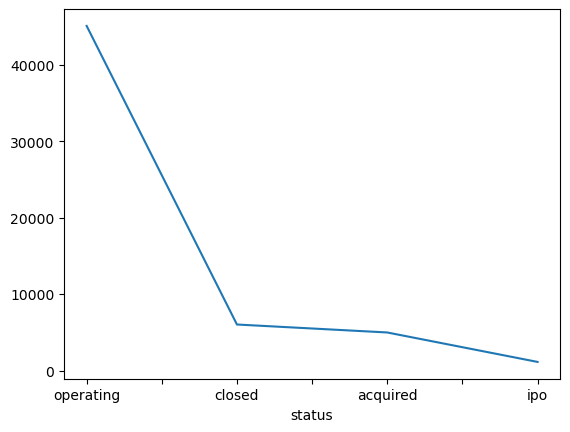

In [56]:
final_df['status'].value_counts().plot()

In [58]:
from ydata_profiling import ProfileReport
final_df_profile = ProfileReport(final_df, title="Final Data Report")
final_df_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [59]:
final_df_profile.to_file("final_data_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]